# SCANPLOT - Um Sistema Simples de Plotagem para o SCANTEC

O SCANTEC (Sistema de Avaliação de modelos Numéricos de Tempo e Clima), é um software robusto escrito em linguagem Fortan para a avaliação de modelos numéricos. A sua aplicação fornece as estatísticas básicas para a quantificação dos modelos através da sua habilidade de previsão. O SCANPLOT representa um conjunto de scripts escritos em linguagem Python para facilitar a plotagem das tabelas das estatísticas do SCANTEC.

Este notebook foi pensado como uma forma de apresentação e tutorial do SCANPLOT. Nele, o usuário deverá ser capaz de utilizar os scripts criados alterando apenas os parâmetros necessários para que os scripts encontrem as tabelas do SCANTEC. Com este protótipo, é possível plotar quatro tipos diferentes de gráficos:

* Série temporal em função do tempo de previsão;
* Série temporal em função dos dias das previsões;
* Scorecard do ganho percentual;
* Scorecard da mudança fracional.

O usuário deverá escolher qual tipo de gráfico deseja plotar em função da sua necessidade.

# Tutorial

O tutorial está dividido em três partes. A primeira, "Importando a função desejada", mostra como carregar a função que se encarregará de plotar um dos tipos de gráficos desejados. A segunda parte, "Entrada dos parâmetros", mostra como ajustar os parâmetros principais (nome das variáveis, regiões, tipo de estatística etc) para a plotagem. E a terceira parte, "Plotagem dos gráficos", mostra como chamar a função carregada na primeira parte, de forma a utilizar os parâmetros ajustados na segunda parte.

Siga o tutorial a seguir para aprender a utilizar o SCANPLOT.

## 1. Importando a função desejada

O primeiro passo para a utilização do SCANPLOT, é definir que tipo de gráfico desejamos construir. Em parte, isso dependerá da forma como o SCANTEC foi utilizado na avaliação. Basicamente, o SCANTEC pode ser aplicado de duas formas distintas: indicando-se as mesmas datas de início de fim; ou, indicando-se duas datas diferentes para o início e o fim. No primeiro caso, o usuário precisará de um script que se encarregará de atualizar as datas de início e fim, de forma que a avaliação possa ser feita para diferentes datas. Ainda neste caso, as tabelas de avaliação serão escritas para cada um dos dias em que o SCANTEC foi aplicado. No segundo caso, apenas uma tabela de cada estatística será escrita, compreendendo o período de avaliação indicado. Esta diferença é essencial para a escolha do tipo de gráfico e qual função deverá ser empregada.

As funções disponíveis atualmente no SCANPLOT, são as seguintes:

* scanplot_diário
* scanplot_mensal
* scanplot_scorecard

Utilize a célula a seguir para importar a função desejada. Pressione as teclas "Ctrl+Enter" para prosseguir ou pressione o botão "Run" na barra de ferramentas acima.

In [1]:
from scanplot_mensal_jn import *
from scanplot_diario_jn import *

##versões utilizadas##
Python version: 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
NumPy version: 1.16.3
pandas version: 0.24.2
matplotlib version: 3.0.3
seaborn version: 0.9.0
    
##versões utilizadas##
Python version: 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
NumPy version: 1.16.3
pandas version: 0.24.2
matplotlib version: 3.0.3
seaborn version: 0.9.0
    


A instrução a seguir permite que controles de exibição das figuras sejam criados (eg., botões de navegação). Caso queira exportar este notebook para um arquivo (eg., PDF, LaTeX), será necessário comentar a instrução abaixo, reiniciar o Kernel e executar todas as células novamente.

In [2]:
#%matplotlib qt
%matplotlib inline

## 2. Entrada dos parâmetros

Nesta segunda etapa, devem ser escolhidos os parâmetros que determinarão qual(is) variáveis, região(ões) e estatística(s) serão utilizados para a plotagem do tipo de gráfico escolhido na etapa anterior.

Na célula abaixo, estão sendo selecionados os parâmetros vars=["VVEL-850"], reg=["hs"], stat=["ACOR"], hsin=["00"] e as previsões de 24, 48 e 72 horas (o comando "np.arange(24,96,24)", cria um array com estes valores). Isso significa que a variável "VVEL-850" (ou seja, a componente meridional do vento horizontal em 850 hPa) sobre a região "hs" (isto é, a região hemisfério sul), com a estatítica "ACOR" (isto é, correlação de anomalia), do horário sinótico das 00Z e das previsões indicadas. A variável "base_path" aponta para o caminho onde encontam-se as tabelas do SCANTEC. Você deverá ajustar este caminho para o seu caso. Observe que o nome da variável escolhida reflete o nome da coluna correspondente da tabela "ACOR\*T.scam" do SCANTEC.

In [3]:
# Datas de início, fim mes e ano
# de forma inteira e sem o zero em números menores do que 10
diaInicial = 2
diaFinal   = 31
mes = 5
ano = 2015

# Escolha das variáveis (em listas)
Vars = ["VVEL-850"]
Regs = ["hs"]
Stats = ["ACOR"]
Hsins = ["00"]
Fcts = np.arange(24,96,24)

# Caminho para absoluto para as tabelas
base_path_diario = "./aval_SMG/diario/00Z/"
base_path_mensal = "./aval_SMG/mensal/00Z/"

## 3. Plotagem dos gráficos

Nesta última etapa, chama-se a funçao definida na primeira etapa, indicando os parâmetros selecionados na etapa anterior.

In [4]:
from matplotlib import pylab

figura: output/diario/HS/ACOR_DIARIO_VVEL-850_HS_24h_2015-05-0200_2015-05-3100.png


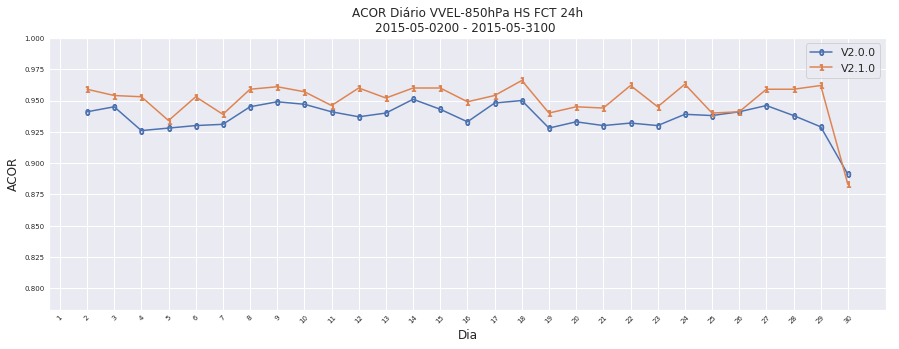

figura: output/diario/HS/ACOR_DIARIO_VVEL-850_HS_48h_2015-05-0200_2015-05-3100.png


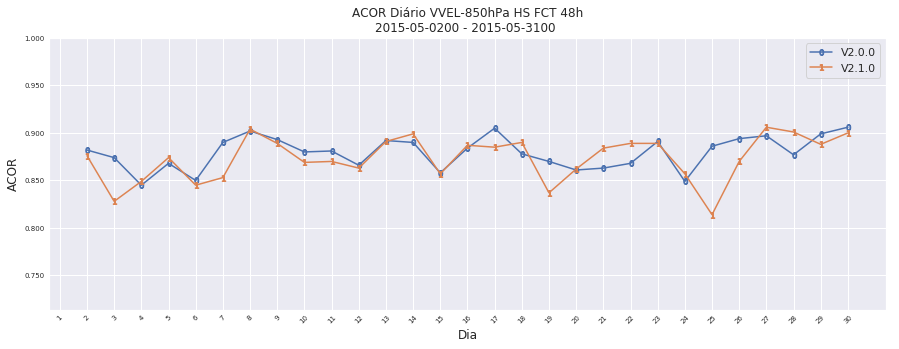

figura: output/diario/HS/ACOR_DIARIO_VVEL-850_HS_72h_2015-05-0200_2015-05-3100.png


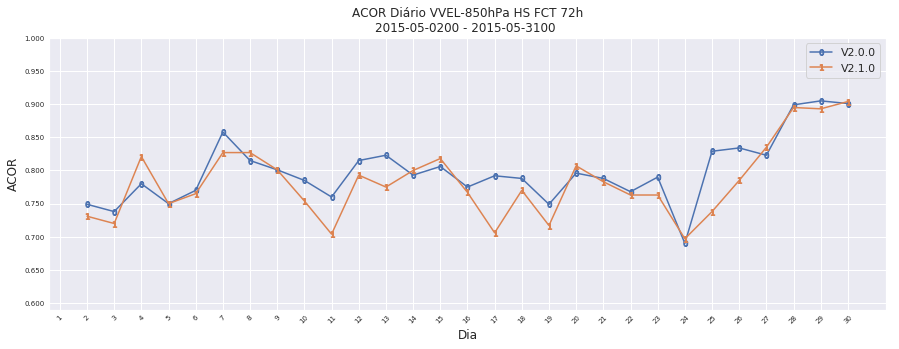

In [5]:
pylab.rcParams['figure.figsize'] = (15,5)
plot_diario(diaInicial,diaFinal,mes,ano,Vars,Stats,Fcts,Regs,Hsins,base_path_diario)


***








figura: output/mensal/HS/ACOR_MENSAL_VVEL-850_HS_0205201500_3105201500.png


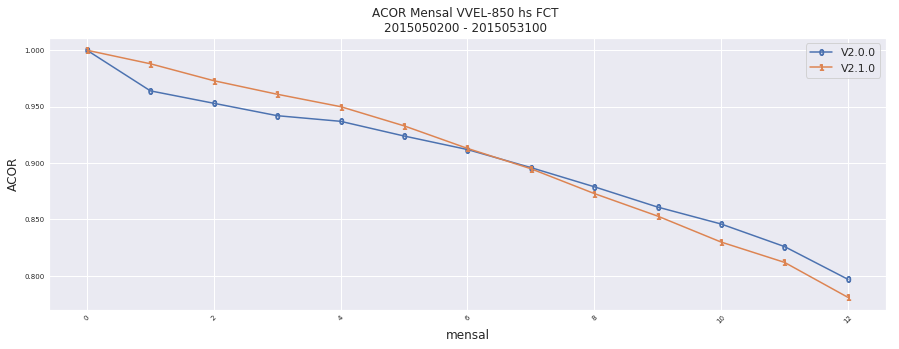

In [6]:
pylab.rcParams['figure.figsize'] = (15,5)
plot_mensal(diaInicial,diaFinal,mes,ano,Vars,Stats,Regs,Hsins,base_path_mensal)